## Tarea 2

## Ecuación diferencial con solución exacta.

Queremos estudiar $$ y' = f(t, y) \quad \textrm{con} \quad y(0)=y_0 $$

La ecuación (lineal) que propongo es
\begin{equation}
    y' = 1 - t + 4y \quad \textrm{con} \quad y(0) = 1
\end{equation}
La solución que satisface esta condición inicial es
\begin{equation}
    y(t) = \frac{19}{16} e^{4t} + \frac{t}{4} - \frac{3}{16}
\end{equation}

### Gráfica de mi solución exacta.

Voy a estudiar la ecuación en el intervalo $[0,2]$

In [1]:
using PyPlot

In [2]:
xs = 0:1/2^6:2
ys = [(19/16)*exp(4t) + (t/4) - (3/16) for t in xs];

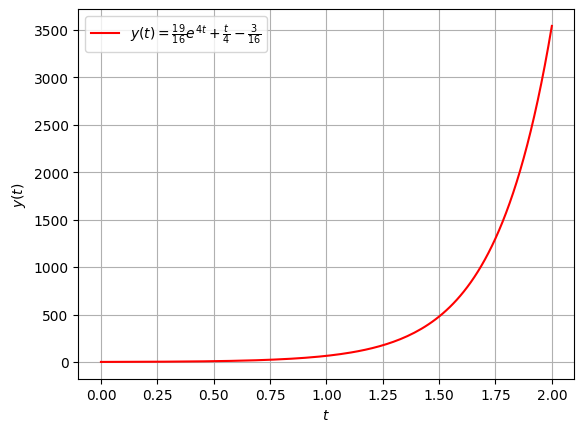

In [3]:
plot(xs, ys, "r", label = L"y(t) = \frac{19}{16} e^{4t} + \frac{t}{4} - \frac{3}{16}")
xlabel(L"t")
ylabel(L"y(t)")
grid("on")
legend();

## Método del Trapezoide (implementación).

Sabemos que la fórmula para encontrar la solución aproximada de nuestra ODE se escribe $$y_{n+1} = y_n + \frac{1}{2}h[f(t_n, y_n) + f(t_{n+1}, y_{n+1})]$$

Notar que necesitamos despejar $y_{n+1}$ en cada paso de tiempo, **en nuestra ecuación particular que elegimos podemos despejar a mano**. Esto es porque tramposamente elegí una ecuación lineal. Si no fuera el caso tengo que implementar en cada paso de tiempo un programa para encontrar $y_{n+1}$, usando por ejemplo Método de Newton.

Sustituyendo $f(t, y) = 1 - t + 4y$ en la fórmula anterior ,es decir haciendo $f(t_n, y_n) = 1 - t_n + 4y_n$ y también $f(t_{n+1}, y_{n+1}) = 1 - t_{n+1} + 4y_{n+1}$,  nos queda

$$y_{n+1}(1-2h) = y_n + \frac{1}{2}h[2 + 4y_n - t_n - t_{n+1}]$$

Finalmente pasando el $1-2h$ del otro lado obtenemos la fórmula para calcular la solución aproximada por el método de Trapezoide **para esta ecuación diferencial** $$y_{n+1} = \frac{y_n}{1-2h} + \frac{1}{2}\frac{h}{1-2h}[2 + 4y_n - t_n - t_{n+1}]$$

Que si definimos los parámetros $H_1 = \frac{1}{1-2h}$ y $H_2 = \frac{1}{2} \frac{h}{1-2h}$ queda expresada

$$y_{n+1} = H_1y_n + H_2[2 + 4y_n - t_n - t_{n+1}]$$

Finalmente la implementamos, para calcular la solución en el intervalo $[0,y_f]$, $y_f = y_{final}$

In [4]:
f(t,y) = 1 - t + 4y

f (generic function with 1 method)

In [5]:
function Trapezoide(f, t0, tf, y0, N)   #Esta función encuentra la solución desde el punto t0 hasta el punto tf
    ts = Float64[]
    ys = Float64[]
    
    h = (tf - t0)/N
    H1 = 1/(1-2h)
    H2 = h/(2-4h)
    
    t_actual = t0
    y_actual = y0
    push!(ts, t_actual)
    push!(ys, y_actual)
    
    
    for j in 1:N
        t_nueva = t_actual + h
        y_nueva = H1*y_actual + H2*(2 + 4*y_actual - t_actual - t_nueva)
        
        push!(ts, t_nueva)
        push!(ys, y_nueva)
        
        t_actual = t_nueva
        y_actual = y_nueva        
    end
    return ts, ys
end

Trapezoide (generic function with 1 method)

In [6]:
Datos = Trapezoide(f, 0, 2, 1, 32)

([0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625  …  1.4375, 1.5, 1.5625, 1.625, 1.6875, 1.75, 1.8125, 1.875, 1.9375, 2.0], [1.0, 1.3549107142857142, 1.8067602040816324, 2.38324526239067, 3.119976051645147, 4.062737066400903, 5.270394085372589, 6.818631681193328, 8.804758590105708, 11.353886044421625  …  384.72506211916664, 494.6130262960713, 635.893087380663, 817.5344159179953, 1051.068802608851, 1351.3228354970943, 1737.359270639121, 2233.687365821727, 2871.819023913649, 3692.2695486032626])

In [7]:
Datos_en_X = Datos[1];

In [8]:
Datos_en_Y = Datos[2];

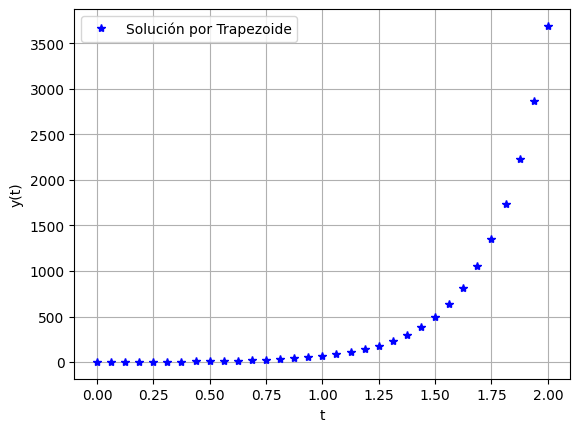

In [9]:
plot(Datos_en_X, Datos_en_Y, "b*", label="Solución por Trapezoide")
xlabel("t")
ylabel("y(t)")
grid("on")
legend();

## Comparación gráfica entre la solución exacta y solución por Método de Trapezoide

In [10]:
X_EXACTA = 1:2/32:2
Y_EXACTA =[(19/16)*exp(4t) + (t/4) - (3/16) for t in X_EXACTA];

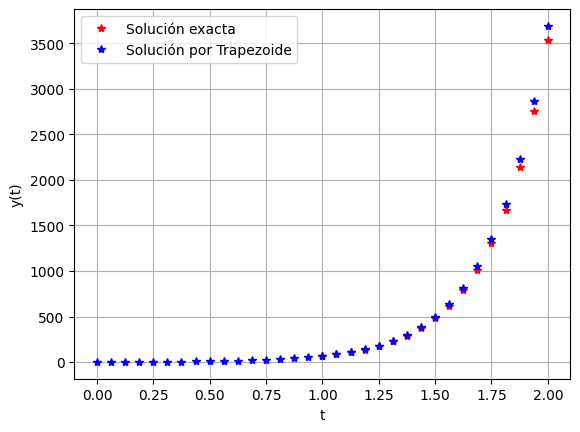

In [11]:
plot(X_EXACTA, Y_EXACTA, "r*", label = "Solución exacta")
plot(Datos_en_X, Datos_en_Y, "b*", label="Solución por Trapezoide")
xlabel("t")
ylabel("y(t)")
grid("on")
legend();

## Análisis del error

Voy a analizar el error **en el punto $2$** para diferentes valores de $h$. Tomo $error = |y(2) - y_n(2)|$, donde $y_n$ es la aproximación obtenida por el método de Trapezoide

Necesito una nueva función `Trapezoide2` (modificación de `Trapezoide`) que solo me devuelve la $y$ en el punto $2$

In [13]:
function Trapezoide2(f, t0, tf, y0, N)
    ts = Float64[]
    ys = Float64[]
    
    h = (tf-t0)/N
    H1 = 1/(1-2h)
    H2 = h/(2-4h)
    
    t_actual = t0
    y_actual = y0
    push!(ts, t_actual)
    push!(ys, y_actual)
    
    
    for j in 1:N
        t_nueva = t_actual + h
        y_nueva = H1*y_actual + H2*(2 + 4*y_actual - t_actual - t_nueva)
        
        push!(ts, t_nueva)
        push!(ys, y_nueva)
        
        t_actual = t_nueva
        y_actual = y_nueva        
    end
    m = length(ys)
    return ys[m]
end

Trapezoide2 (generic function with 1 method)

In [14]:
function sol_Exacta(N)
    us = range(0, stop=2, length=N+1)
    vs = [(19/16)*exp(4t) + (t/4) - (3/16) for t in us]
    
    n = length(vs)
    return vs[n]
end

sol_Exacta (generic function with 1 method)

Voy a graficar $h$ contra $errores$ con $h:=\frac{2}{NS}$

In [15]:
NS = [2^x for x in 6:15]
h = [2/x for x in NS]
errores = [abs(Trapezoide2(f, 0, 2, 1, X) - sol_Exacta(X)) for X in NS]

10-element Array{Float64,1}:
 37.15412250322561
  9.23589025154206
  2.3057025607186006
  0.5762215760391882
  0.14404264480845086
  0.03600986406672746
  0.009002416276416625
  0.002250600188745011
  0.0005626499623758718
  0.00014066246649235836

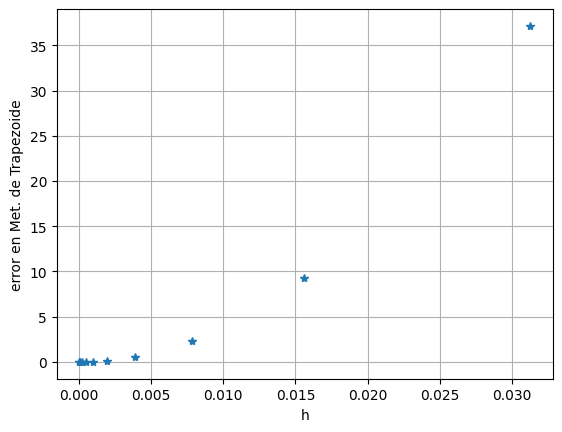

In [17]:
plot(h, errores, "*")
xlabel("h")
ylabel("error en Met. de Trapezoide")
#xscale("log")
#yscale("log")
grid("on")